In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [240]:
data =pd.read_csv('./dataset and all/test_set_features.csv')

In [241]:
data2 =pd.read_csv('./dataset and all/training_set_features.csv')

In [242]:
data3 =pd.read_csv('./dataset and all/training_set_labels.csv')

In [296]:
import pandas as pd

dataf =pd.concat([data2 ,data3] ,axis =1)



In [425]:

dd =dataf.drop(columns=['employment_industry' ,'employment_occupation' ,'health_insurance' ,'income_poverty' ,'rent_or_own'])
dd.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
marital_status           

In [427]:
object_columns = dd.columns[dd.dtypes == 'object']

# Fill NaN values in these columns with 'Unknown'
dd[object_columns] = dd[object_columns].fillna('Unknown')

In [ ]:
dd.dropna().shape

In [428]:
ddn = pd.get_dummies(dd, columns=["employment_status"  ,"age_group" ,"education" ,"race" ,"sex" ,"marital_status"  ,"hhs_geo_region" ,"census_msa"])

In [317]:
ddn

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0                  0          1.0            0.0                        0.0   
1                  1          3.0            2.0                        0.0   
2                  2          1.0            1.0                        0.0   
3                  3          1.0            1.0                        0.0   
4                  4          2.0            1.0                        0.0   
...              ...          ...            ...                        ...   
26702          26702          2.0            0.0                        0.0   
26703          26703          1.0            2.0                        0.0   
26704          26704          2.0            2.0                        0.0   
26705          26705          1.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_xyz  doctor_recc_seasonal  \
0                        1.0              0.0                   0.0   
1                        1.0              0.0                   0.0   
2                        0.0              0.0                   0.0   
3                        0.0              0.0                   1.0   
4                        1.0              0.0                   0.0   
...                      ...              ...                   ...   
26702                    0.0              0.0                   0.0   
26703                    0.0              1.0                   1.0   
26704                    1.0              0.0                   0.0   
26705                    1.0              0.0                   0.0   
26706                    0.0              0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        1.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            0.0   
...                      ...                   ...            ...   
26702                    0.0                   0.0  

In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


In [451]:
X_train, X_test, y_train, y_test = train_test_split(ddnnn.drop(columns=['xyz_vaccine' ,'seasonal_vaccine']), ddnnn['seasonal_vaccine'], test_size=0.4, random_state=42)



In [452]:
modela = LogisticRegression()

[[0.79113187 0.20886813]
 [0.75573603 0.24426397]
 [0.20580161 0.79419839]
 ...
 [0.19178242 0.80821758]
 [0.2730257  0.7269743 ]
 [0.90185127 0.09814873]]
AUC - Test Set: 84.95%


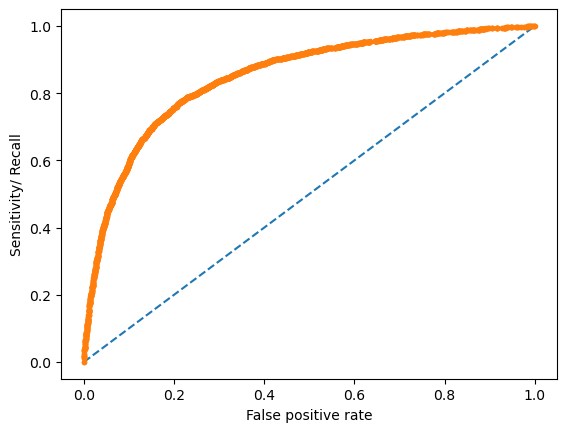

In [453]:
#Classification Area under curve

seed = 7
#split data


modela.fit(X_train, y_train)

# predict probabilities
probs = modela.predict_proba(X_test)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [429]:
corr_matrix = ddn.corr()

# Extract the correlation values for the 'xyz_vaccine' column
xyz_vaccine_corr = corr_matrix['seasonal_vaccine']

# Select columns where the correlation with 'xyz_vaccine' is greater than 0.05 or less than -0.05
significant_corr = xyz_vaccine_corr[(xyz_vaccine_corr > 0.05) | (xyz_vaccine_corr < -0.05)]

# Filter the original DataFrame to include only these columns
ddnnn = ddn[significant_corr.index]
significant_corr.index

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'health_worker', 'opinion_xyz_vacc_effective',
       'opinion_xyz_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults', 'household_children',
       'xyz_vaccine', 'seasonal_vaccine', 'employment_status_Employed',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_65+ Years',
       'education_College Graduate', 'race_Black', 'race_Hispanic',
       'race_White', 'sex_Female', 'sex_Male', 'marital_status_Married'],
      dtype='object')

In [231]:
pd.set_option('display.max_columns', None)

In [232]:
model = LogisticRegression(max_iter=1000,random_state=42,penalty='l1', solver='liblinear', C=1.0)
X_train, X_test, y_train, y_test = train_test_split(ddnnn.drop(columns=['xyz_vaccine' ,'seasonal_vaccine']), ddnnn['seasonal_vaccine'], test_size=0.8, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

[[0.87834356 0.12165644]
 [0.92041027 0.07958973]
 [0.23537944 0.76462056]
 ...
 [0.32912691 0.67087309]
 [0.10981281 0.89018719]
 [0.55420371 0.44579629]]


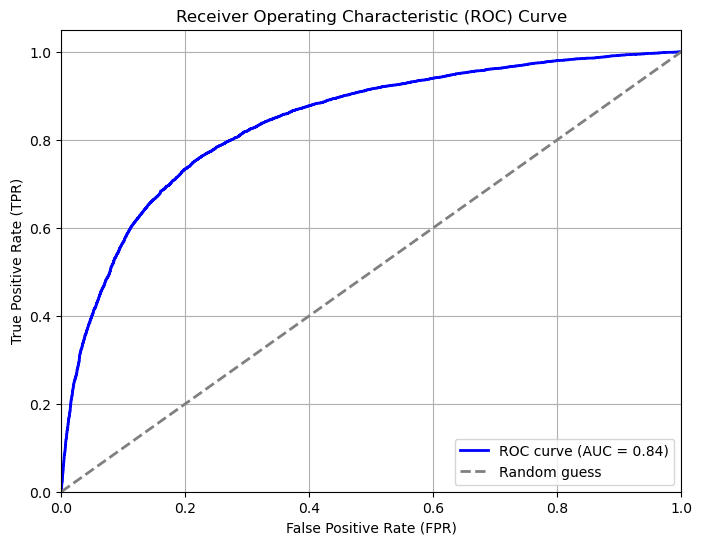

In [233]:
probs = model.predict_proba(X_test)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Sample data (you can replace this with your own data)


# Load the data into a DataFrame
df = ddnnn

# Split the data into features and target
X = ddnnn.drop(columns=['xyz_vaccine' ,'seasonal_vaccine'])
y = ddnnn['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7754898290278298
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      4342
           1       0.77      0.72      0.75      3671

    accuracy                           0.78      8013
   macro avg       0.78      0.77      0.77      8013
weighted avg       0.78      0.78      0.77      8013



In [284]:
data

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              26707          2.0            2.0                        0.0   
1              26708          1.0            1.0                        0.0   
2              26709          2.0            2.0                        0.0   
3              26710          1.0            1.0                        0.0   
4              26711          3.0            1.0                        1.0   
...              ...          ...            ...                        ...   
26703          53410          1.0            1.0                        0.0   
26704          53411          3.0            1.0                        0.0   
26705          53412          0.0            1.0                        0.0   
26706          53413          3.0            1.0                        0.0   
26707          53414          2.0            1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_xyz  doctor_recc_seasonal  \
0                        1.0              0.0                   0.0   
1                        0.0              0.0                   0.0   
2                        1.0              0.0                   0.0   
3                        0.0              1.0                   1.0   
4                        1.0              0.0                   0.0   
...                      ...              ...                   ...   
26703                    1.0              1.0                   1.0   
26704                    1.0              0.0                   0.0   
26705                    0.0              0.0                   0.0   
26706                    0.0              0.0                   0.0   
26707                    1.0              1.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        0.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            1.0   
...                      ...                   ...            ...   
26703                    0.0                   0.0  

In [350]:
data

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              26707          2.0            2.0                        0.0   
1              26708          1.0            1.0                        0.0   
2              26709          2.0            2.0                        0.0   
3              26710          1.0            1.0                        0.0   
4              26711          3.0            1.0                        1.0   
...              ...          ...            ...                        ...   
26703          53410          1.0            1.0                        0.0   
26704          53411          3.0            1.0                        0.0   
26705          53412          0.0            1.0                        0.0   
26706          53413          3.0            1.0                        0.0   
26707          53414          2.0            1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_xyz  doctor_recc_seasonal  \
0                        1.0              0.0                   0.0   
1                        0.0              0.0                   0.0   
2                        1.0              0.0                   0.0   
3                        0.0              1.0                   1.0   
4                        1.0              0.0                   0.0   
...                      ...              ...                   ...   
26703                    1.0              1.0                   1.0   
26704                    1.0              0.0                   0.0   
26705                    0.0              0.0                   0.0   
26706                    0.0              0.0                   0.0   
26707                    1.0              1.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        0.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            1.0   
...                      ...                   ...            ...   
26703                    0.0                   0.0  

In [351]:
dda =data.drop(columns=['employment_industry' ,'employment_occupation' ,'health_insurance' ,'income_poverty'])


In [352]:
float_columns = dda.columns[dda.dtypes == 'float64']
dda[float_columns] = dda[float_columns].apply(lambda x: x.fillna(x.median()))

In [353]:
object_columns = dda.columns[dda.dtypes == 'object']

# Fill NaN values in these columns with 'Unknown'
dda[object_columns] = dda[object_columns].fillna('Unknown')

In [354]:
ddan = pd.get_dummies(dda, columns=["employment_status"  ,"age_group" ,"education" ,"race" ,"sex" ,"marital_status" ,"rent_or_own" ,"hhs_geo_region" ,"census_msa"])

In [454]:
pred_s =modela.predict_proba(ddann)[: ,1]
print(pred_s)

[0.25894777 0.07775779 0.63994039 ... 0.20579609 0.31272827 0.55229813]


In [450]:
pred_x =modela.predict_proba(ddann)[: ,1]
print(pred_x)

[0.0806712  0.05310145 0.43991135 ... 0.13473663 0.04197806 0.54043712]


In [455]:
df = pd.DataFrame({
    'respondent_id':dda.respondent_id,
    'xyz_vaccine': pred_x,
    'seasonal_vaccine': pred_s
})

In [441]:
df

respondent_id  xyz_vaccine  seasonal_vaccine
0              26707     0.076622          0.218161
1              26708     0.050754          0.063715
2              26709     0.440952          0.655852
3              26710     0.501522          0.890891
4              26711     0.163571          0.482489
5              26712     0.393854          0.900717
6              26713     0.397687          0.623927
7              26714     0.136030          0.193555
8              26715     0.037434          0.136040
9              26716     0.187784          0.868369
10             26717     0.015920          0.360114
11             26718     0.215964          0.450873
12             26719     0.113821          0.937604
13             26720     0.084052          0.160134
14             26721     0.414534          0.514232
15             26722     0.045747          0.069908
16             26723     0.660149          0.851456
17             26724     0.114416          0.615051
18             26725     0.039325          0.075691
19             26726     0.012734          0.030583
20             26727     0.303230          0.819302
21             26728     0.198367          0.465783
22             26729     0.078590          0.308925
23             26730     0.044087          0.203380
24             26731     0.016680          0.316065
25             26732     0.094782          0.061889
26             26733     0.923007          0.958836
27             26734     0.857847          0.357295
28             26735     0.158352          0.483281
29             26736     0.074778          0.169683
30             26737     0.076897          0.106478
31             26738     0.593699          0.865845
32             26739     0.095845          0.182023
33             26740     0.153820          0.109002
34             26741     0.215203          0.917207
35             26742     0.146947          0.422512
36             26743     0.036439          0.460109
37             26744     0.047939          0.523916
38             26745     0.102020          0.925836
39             26746     0.136862          0.312497
40             26747     0.088005          0.288110
41             26748     0.109975          0.068411
42             26749     0.066713          0.638529
43             26750     0.696198          0.937045
44             26751     0.294035          0.657601
45             26752     0.018435          0.016183
46             26753     0.201357          0.645707
47             26754     0.112482          0.521546
48             26755     0.104706          0.340913
49             26756     0.015899          0.034667
50             26757     0.486134          0.516569
51             26758     0.507549          0.825871
52             26759     0.039378          0.193616
53             26760     0.012845          0.027197
54             26761     0.145205          0.656874
55             26762     0.160019          0.843812
56             26763     0.904776          0.972484
57             26764     0.923049          0.968314
58             26765     0.032994          0.675742
59             26766     0.153117          0.172233
60             26767     0.750944          0.747909
61             26768     0.011262          0.431481
62             26769     0.134558          0.169728
63             26770     0.120995          0.645891
64             26771     0.076013          0.197786
65             26772     0.085348          0.415025
66             26773     0.010513          0.387910
67             26774     0.035462          0.449259
68             26775     0.098526          0.465796
69             26776     0.413323          0.317328
70             26777     0.119117          0.911796
71             26778     0.137393          0.194540
72             26779     0.126213          0.556328
73             26780     0.157715          0.955423
74             26781     0.052291          0.512787
75             26782     0.046565          0.251554
76 

In [456]:
df.to_csv('Answer.csv', index=False)